# Мария Студеникина СТФИ-122
## Вариант 2

In [1]:
# Импорт библиотек для проведения расчетов
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import OneHotEncoder

In [2]:
# Импорт библиотек для кластеризации
from sklearn.cluster import AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

In [3]:
# Импорт библиотек для визуализации
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# Библиотека для построения tSNE
from sklearn.manifold import TSNE

In [5]:
# Библиотека для пункта 10
from varclushi import VarClusHi

In [6]:
# Импорт библиотек для текста
from simple_colors import *

## Загрузка данных

In [7]:
# Загружаем данные из SAS файла
df = pd.read_csv("/Users/manya/Desktop/data/dz_2/baseball.csv")
# Пример данных
df.head()

,Name,Team,nAtBat,nHits,nHome,nRuns,nRBI,nBB,YrMajor,CrAtBat,...,CrBB,League,Division,Position,nOuts,nAssts,nError,Salary,Div,logSalary
0,"Allanson, Andy",Cleveland,293,66,1,30,29,14,1,293,...,14,American,East,C,446,33,20,NaN,AE,NaN
1,"Ashby, Alan",Houston,315,81,7,24,38,39,14,3449,...,375,National,West,C,632,43,10,475.0,NW,6.163315
2,"Davis, Alan",Seattle,479,130,18,66,72,76,3,1624,...,263,American,West,1B,880,82,14,480.0,AW,6.173786
3,"Dawson, Andre",Montreal,496,141,20,65,78,37,11,5628,...,354,National,East,RF,200,11,3,500.0,NE,6.214608
4,"Galarraga, Andres",Montreal,321,87,10,39,42,30,2,396,...,33,National,East,1B,805,40,4,91.5,NE,4.516339


## 2. Обработка пропусков

Переменная Salary (и log Salary) может содержать пропуски, произведите подстановку пропусков методом SimpleImputer (mean).

In [8]:
imp = SimpleImputer(strategy = 'mean')
df_2 = df.copy()
df_2.Salary = imp.fit_transform(df_2['Salary'].values.reshape(-1, 1))
df_2.logSalary = imp.fit_transform(df_2['logSalary'].values.reshape(-1, 1))
df_2

,Name,Team,nAtBat,nHits,nHome,nRuns,nRBI,nBB,YrMajor,CrAtBat,...,CrBB,League,Division,Position,nOuts,nAssts,nError,Salary,Div,logSalary
0,"Allanson, Andy",Cleveland,293,66,1,30,29,14,1,293,...,14,American,East,C,446,33,20,535.925882,AE,5.927222
1,"Ashby, Alan",Houston,315,81,7,24,38,39,14,3449,...,375,National,West,C,632,43,10,475.000000,NW,6.163315
2,"Davis, Alan",Seattle,479,130,18,66,72,76,3,1624,...,263,American,West,1B,880,82,14,480.000000,AW,6.173786
3,"Dawson, Andre",Montreal,496,141,20,65,78,37,11,5628,...,354,National,East,RF,200,11,3,500.000000,NE,6.214608
4,"Galarraga, Andres",Montreal,321,87,10,39,42,30,2,396,...,33,National,East,1B,805,40,4,91.500000,NE,4.516339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,"McGee, Willie",St Louis,497,127,7,65,48,37,5,2703,...,138,National,East,CF,325,9,3,700.000000,NE,6.551080
318,"Randolph, Willie",New York,492,136,5,76,50,94,12,5511,...,875,American,East,2B,313,381,20,875.000000,AE,6.774224
319,"Tolleson, Wayne",Chicago,475,126,3,61,43,52,6,1700,...,146,American,West,3B,37,113,7,385.000000,AW,5.953243
320,"Upshaw, Willie",Toronto,573,144,9,85,60,78,8,3198,...,332,American,East,1B,1314,131,12,960.000000,AE,6.866933


Пересчитайте logSalary как log(1+Salary), чтобы получить более симметричное распределение.

In [9]:
for i in range(df_2.shape[0]):
    df_2['logSalary'][i] = np.log(1 + df_2['Salary'][i])
df_2

/var/folders/6x/rs3q6wm50jqgd1x59wf94cv80000gn/T/ipykernel_4976/1889235711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['logSalary'][i] = np.log(1 + df_2['Salary'][i])


,Name,Team,nAtBat,nHits,nHome,nRuns,nRBI,nBB,YrMajor,CrAtBat,...,CrBB,League,Division,Position,nOuts,nAssts,nError,Salary,Div,logSalary
0,"Allanson, Andy",Cleveland,293,66,1,30,29,14,1,293,...,14,American,East,C,446,33,20,535.925882,AE,6.285860
1,"Ashby, Alan",Houston,315,81,7,24,38,39,14,3449,...,375,National,West,C,632,43,10,475.000000,NW,6.165418
2,"Davis, Alan",Seattle,479,130,18,66,72,76,3,1624,...,263,American,West,1B,880,82,14,480.000000,AW,6.175867
3,"Dawson, Andre",Montreal,496,141,20,65,78,37,11,5628,...,354,National,East,RF,200,11,3,500.000000,NE,6.216606
4,"Galarraga, Andres",Montreal,321,87,10,39,42,30,2,396,...,33,National,East,1B,805,40,4,91.500000,NE,4.527209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,"McGee, Willie",St Louis,497,127,7,65,48,37,5,2703,...,138,National,East,CF,325,9,3,700.000000,NE,6.552508
318,"Randolph, Willie",New York,492,136,5,76,50,94,12,5511,...,875,American,East,2B,313,381,20,875.000000,AE,6.775366
319,"Tolleson, Wayne",Chicago,475,126,3,61,43,52,6,1700,...,146,American,West,3B,37,113,7,385.000000,AW,5.955837
320,"Upshaw, Willie",Toronto,573,144,9,85,60,78,8,3198,...,332,American,East,1B,1314,131,12,960.000000,AE,6.867974


## 3. Нормализация переменных 
Приведите числовые переменные к близким шкалам с помощью метода RobustScaler и закодируйте категориальные с помощью OneHotEncoder.

In [10]:
# Сформируем признаковое пространство:
# 1. YrMajor - число лет в лиге
# 2. Признаки с префиксом "n" - результаты 1986 года 
# 3. Признаки с префиксом "сr"  - результаты за всю карьеру

df_3_1 = df_2.copy()
results_1986 = [c for c in df_3_1.columns if c[0] == "n"]
results_all = [c for c in df_3_1.columns if c[:2] == "Cr"]
sign_features = ['YrMajor'] + results_1986 + results_all

In [11]:
# Стандартизация признаков
scaler = RobustScaler()
df_3_1 = df_3_1.loc[:, sign_features]
scaler.fit(df_3_1)
df_3_1 = pd.DataFrame(scaler.transform(df_3_1), columns = df_3_1.columns)
df_3_1.head()


,YrMajor,nAtBat,nHits,nHome,nRuns,nRBI,nBB,nOuts,nAssts,nError,CrAtBat,CrHits,CrHome,CrRuns,CrRbi,CrBB
0,-0.714286,-0.404984,-0.465950,-0.625000,-0.473684,-0.444444,-0.671875,1.084589,-0.040881,1.750,-0.561248,-0.559585,-0.490566,-0.524153,-0.609235,-0.558100
1,1.142857,-0.313603,-0.250896,-0.125000,-0.631579,-0.194444,0.109375,1.946698,0.022013,0.500,0.438356,0.325849,0.364780,0.122154,0.452102,0.666667
2,-0.428571,0.367601,0.451613,0.791667,0.473684,0.750000,1.265625,3.096176,0.267296,1.000,-0.139679,-0.109384,0.289308,-0.093282,0.044108,0.286684
3,0.714286,0.438214,0.609319,0.958333,0.447368,0.916667,0.046875,-0.055620,-0.179245,-0.375,1.128514,1.177893,2.327044,1.248195,1.620951,0.595420
4,-0.571429,-0.288681,-0.164875,0.125000,-0.236842,-0.083333,-0.171875,2.748552,0.003145,-0.250,-0.528625,-0.519286,-0.352201,-0.484175,-0.562371,-0.493639


data_3_2 = df_3.copy()
df_Div = df_2['Div'].to_numpy().reshape(-1, 1)
ohe = OneHotEncoder()
Div = ohe.fit_transform(df_Div).toarray()
data_3_2['Div'] = Div.tolist()
#Div

In [12]:
df_3_2 = df_2.copy()
df_3_2 = pd.get_dummies(df_3_2[['Div', 'Division', 'Position', 'Team']])
df_3_2.head()

,Div_AE,Div_AW,Div_NE,Div_NW,Division_East,Division_West,Position_13,Position_1B,Position_1O,Position_23,...,Team_New York,Team_Oakland,Team_Philadelphia,Team_Pittsburgh,Team_San Diego,Team_San Francisco,Team_Seattle,Team_St Louis,Team_Texas,Team_Toronto
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_3 = pd.concat([df_3_1, df_3_2], axis = 1)
df_3


,YrMajor,nAtBat,nHits,nHome,nRuns,nRBI,nBB,nOuts,nAssts,nError,...,Team_New York,Team_Oakland,Team_Philadelphia,Team_Pittsburgh,Team_San Diego,Team_San Francisco,Team_Seattle,Team_St Louis,Team_Texas,Team_Toronto
0,-0.714286,-0.404984,-0.465950,-0.625000,-0.473684,-0.444444,-0.671875,1.084589,-0.040881,1.750,...,0,0,0,0,0,0,0,0,0,0
1,1.142857,-0.313603,-0.250896,-0.125000,-0.631579,-0.194444,0.109375,1.946698,0.022013,0.500,...,0,0,0,0,0,0,0,0,0,0
2,-0.428571,0.367601,0.451613,0.791667,0.473684,0.750000,1.265625,3.096176,0.267296,1.000,...,0,0,0,0,0,0,1,0,0,0
3,0.714286,0.438214,0.609319,0.958333,0.447368,0.916667,0.046875,-0.055620,-0.179245,-0.375,...,0,0,0,0,0,0,0,0,0,0
4,-0.571429,-0.288681,-0.164875,0.125000,-0.236842,-0.083333,-0.171875,2.748552,0.003145,-0.250,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,-0.142857,0.442368,0.408602,-0.125000,0.447368,0.083333,0.046875,0.523754,-0.191824,-0.375,...,0,0,0,0,0,0,0,1,0,0
318,0.857143,0.421599,0.537634,-0.291667,0.736842,0.138889,1.828125,0.468134,2.147799,1.750,...,1,0,0,0,0,0,0,0,0,0
319,0.000000,0.350987,0.394265,-0.458333,0.342105,-0.055556,0.515625,-0.811124,0.462264,0.125,...,0,0,0,0,0,0,0,0,0,0
320,0.285714,0.758048,0.652330,0.041667,0.973684,0.416667,1.328125,5.107764,0.575472,0.750,...,0,0,0,0,0,0,0,0,0,1


## 4. Иерархическая кластеризация
С помощью восходящей иерархической кластеризации с выбранными параметрами расстояния link=complete, dist=euclidean постройте кластерную модель данных и дендрограмму для топ 20 кластеров.

In [14]:
df_4 = df_3.copy()

In [15]:
# Обучим модель Иерархической кластеризации
clustering = AgglomerativeClustering(affinity = 'euclidean', linkage = 'complete', compute_distances = True, distance_threshold = 0.0, n_clusters = None).fit(df_4)

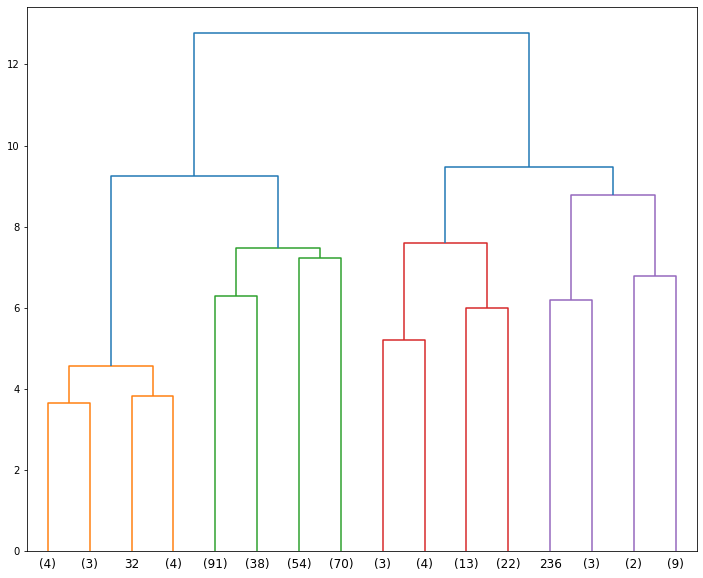

In [16]:
# Визуализация дендрограммы
def plot_dendrogram(model, **kwargs):
    # Создаем матрицу связности

    # Рассчитываем количество наблюдений в каждой вершине
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Лист
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    fig, axes = plt.subplots(1, 1, figsize=(12, 10))
    dendrogram(linkage_matrix, **kwargs, show_leaf_counts = True)

plot_dendrogram(clustering, truncate_mode="level", p = 3)

## 5. Псевдо критерий Фишера
Рассчитайте значение критерия pseudoF для вариантов кластеризации 2-20 кластеров, постройте график зависимости критерия от числа кластеров и выберите оптимальное (первый локальный пик критерия при обходе от малого числа кластеров к большому). Отметьте точку на графике. Сколько кластеров получилось?

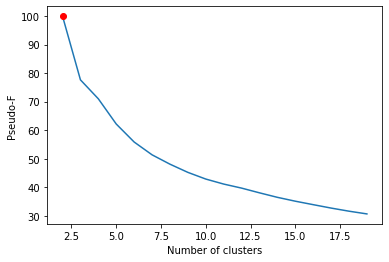

In [17]:
# Выберем число кластеров на основе псевдо критерия Фишера

df_5 = df_4.copy()

def sum_dist_to_center(df_5):
    center = np.mean(df_5, axis = 0)
    return ((df_5 - center)**2).values.sum()

def choose_num_clusters(df_5, max_clust = 20):
    N = df_5.shape[0]
    Q = sum_dist_to_center(df_5)
    pseudo_f = np.array([])
    for G in range(2, max_clust):
        #clustering = KMeans(n_clusters=G).fit(df_5)
        clustering = AgglomerativeClustering(compute_distances = True, n_clusters = G).fit(df_5)
        W = 0
        for l in range(G):
            elems = df_5[clustering.labels_ == l]
            W += sum_dist_to_center(elems)
        fisher_stat = ((Q - W)/(G - 1))/(W/(N - G))
        pseudo_f = np.append(pseudo_f, fisher_stat)
    plt.plot(range(2, max_clust), pseudo_f)
    plt.xlabel('Number of clusters')
    plt.ylabel('Pseudo-F')
    return np.argmax(pseudo_f) + 2, pseudo_f, clustering

k, pseudo_f, clustering_5 = choose_num_clusters(df_5)
label = clustering.labels_
plt.plot(k, pseudo_f[k - 2], 'ro')

In [18]:
# Сколько кластеров получилось?
print('\n', yellow('Число кластеров =','bold'), k)
#print('Число кластеров =', k)


 Число кластеров = 2


## 6. tSNE
С помощью метода проекции tSNE постройте отображение на плоскость, цветом точки укажите номер кластера.

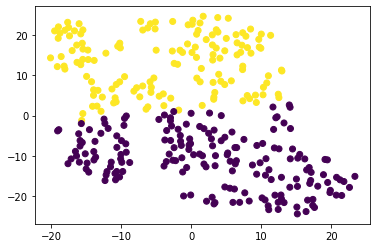

In [19]:
df_6 = df_5.copy()
embedded = TSNE(n_components = 2, learning_rate = 'auto', init = 'random', perplexity = 25).fit_transform(df_6)

clustering_6 = KMedoids(n_clusters = k).fit(df_6)
label_6 = clustering_6.fit_predict(embedded)

plt.scatter(*embedded.T, c = label_6)

/Users/manya/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


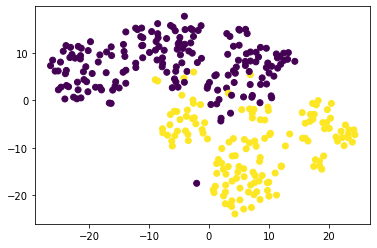

In [20]:
df_6 = df_5.copy()

# Определяем модель и скорость обучения
model = TSNE(learning_rate = 'auto')

# Обучаем модель
transformed = model.fit_transform(df_6)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

#label_6 = clustering_5.fit_predict(transformed)

plt.scatter(x_axis, y_axis, c = label_6)

df_6 = df_5.copy()

clustering_6 = clustering_5

label_6 = clustering_6.fit_predict(transformed)

baseball_tsne = TSNE(n_components = 2, learning_rate = 'auto', init = 'random', perplexity = 2).fit_transform(df_6)
#plt.scatter(*baseball_tsne.T, c = label_6, cmap = 'rainbow')
plt.scatter(*baseball_tsne.T, c = label_6)

## 7. Кластеризация сферическими кластерами
Выполните кластеризацию сферическими кластерами с прототипом методом KMedoids, также постройте проекцию как на шаге 6, определите наиболее типичного представителя (по имени) в каждом из кластеров.

127
307
Ward, Gary
Teufel, Tim


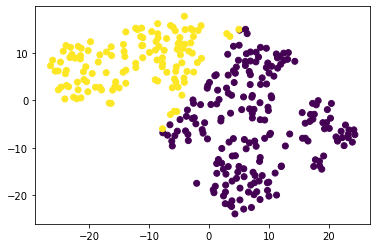

In [63]:
df_7 = df_6.copy()

fig, axes = plt.subplots()
clustering_7 = KMedoids(n_clusters = k).fit(df_7)

#baseball_tsne = TSNE(n_components = 2, learning_rate = 'auto', init = 'random', perplexity = 20).fit_transform(df_7)

x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
label = clustering_7.fit_predict(transformed)

plt.scatter(x_axis, y_axis, c = label)


clusters = KMedoids(n_clusters = k).fit(df_7)
df_7["cluster"] = label

for i in range(k):
    cur_cluster = df_7[df_7["cluster"] == i]
    center = np.mean(cur_cluster, axis = 0)
    print(np.sqrt(((cur_cluster - center) ** 2).sum(axis=1)).sort_values().index[0])

print(df['Name'].loc[127])
print(df['Name'].loc[307])

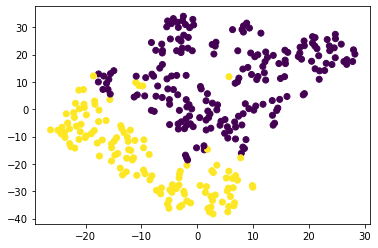

In [22]:
df_7 = df_6.copy()

fig, axes = plt.subplots()
clustering_7 = KMedoids(n_clusters = k).fit(df_7)

baseball_tsne = TSNE(n_components = 2, learning_rate = 'auto', init = 'random', perplexity = 20).fit_transform(df_7)
plt.scatter(*baseball_tsne.T, c = label)

df_7_2 = df_6.copy()

clusters = KMedoids(n_clusters = k)
df_7_2["cluster"] = clusters

for i in range(k):
    cur_cluster = df_7_2[df_7_2["cluster"] == i]
    center = pd.Series(np.append(clusters, 0), index=df_7_2.columns)
    print(np.sqrt(((cur_cluster - center) ** 2).sum(axis=1)).sort_values().index[0])

## 8. Реализуйте шаги 3-7 в виде функции или класса

In [23]:
def all(data_8):
    # пункт 3
    results_1986 = [c for c in df.columns if c[0] == "n"]
    results_all = [c for c in df.columns if c[:2] == "Cr"]
    sign_features = ['YrMajor'] + results_1986 + results_all
    scaler = RobustScaler()
    data_8 = data_8.loc[:, sign_features]
    scaler.fit(data_8)
    data_8 = pd.DataFrame(scaler.transform(data_8), columns = data_8.columns)
    data_8_2 = df_2.copy()
    data_8_2 = pd.get_dummies(data_8_2[['Div', 'Division', 'Position', 'Team']])
    data__8 = pd.concat([data_8, data_8_2], axis = 1)
    
    # пункт 4
    df_8_4 = data__8.copy()
    clustering_8_4 = AgglomerativeClustering(affinity = 'euclidean', linkage = 'complete', compute_distances = True, distance_threshold = 0.0, n_clusters = None).fit(df_8_4)
    def plot_dendrogram(model, **kwargs):
        counts = np.zeros(model.children_.shape[0])
        n_samples = len(model.labels_)
        for i, merge in enumerate(model.children_):
            current_count = 0
            for child_idx in merge:
                if child_idx < n_samples:
                    current_count += 1  # Лист
                else:
                    current_count += counts[child_idx - n_samples]
            counts[i] = current_count

        linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

        fig, axes = plt.subplots(1, 1, figsize = (12, 10))
        dendrogram(linkage_matrix, **kwargs, show_leaf_counts = True)

    plot_dendrogram(clustering_8_4, truncate_mode="level", p = 3)
    plt.show()
    
    # пункт 5
    df_8_5 = df_8_4.copy()
    def sum_dist_to_center(df_8_5):
        center = np.mean(df_8_5, axis = 0)
        return ((df_8_5 - center)**2).values.sum()
    
    def choose_num_clusters(df_8_5, max_clust = 20):
        N = df_8_5.shape[0]
        Q = sum_dist_to_center(df_8_5)
        pseudo_f = np.array([])
        for G in range(2, max_clust):
            #clustering = KMeans(n_clusters=G, random_state=0).fit(df_5)
            clustering = AgglomerativeClustering(compute_distances = True, n_clusters = G).fit(df_8_5)
            W = 0
            for l in range(G):
                elems = df_8_5[clustering.labels_ == l]
                W += sum_dist_to_center(elems)
            fisher_stat = ((Q - W)/(G - 1))/(W/(N - G))
            pseudo_f = np.append(pseudo_f, fisher_stat)
        plt.plot(range(2, max_clust), pseudo_f)
        plt.plot(np.argmax(pseudo_f) + 2, pseudo_f[np.argmax(pseudo_f)], 'ro')
        plt.xlabel('Number of clusters')
        plt.ylabel('Pseudo-F')
        return np.argmax(pseudo_f) + 2, pseudo_f, clustering

    k_8, pseudo_f_8, clustering_8 = choose_num_clusters(df_8_5)
    label_8 = clustering.labels_
    #plt.plot(k_8, pseudo_f_8[k_8 - 2], 'ro')
    
    # пункт 6
    df_8_6 = df_8_5.copy()

    model = TSNE(learning_rate=100)
    transformed_8 = model.fit_transform(df_8_6)
    x_axis_8 = transformed[:, 0]
    y_axis_8 = transformed[:, 1]

    #label_8 = clustering_8.fit_predict(transformed_8)
    label_8 = clustering_6.fit_predict(embedded)

    #plt.scatter(x_axis_8, y_axis_8, c = label_8)
    
    # пункт 7
    df_8_7 = df_8_6.copy()

    fig, axes = plt.subplots()
    clustering_8_7 = KMedoids(n_clusters = k_8).fit(df_8_7)

    x_axis_8_7 = transformed[:, 0]
    y_axis_8_7 = transformed[:, 1]
    label_8_7 = clustering_8_7.fit_predict(transformed)

    #plt.scatter(x_axis_8_7, y_axis_8_7, c = label_8_7)
    
    return k_8, label_8, x_axis_8, y_axis_8, x_axis_8_7, y_axis_8_7, label_8_7

In [24]:
df_8 = df_2.copy()

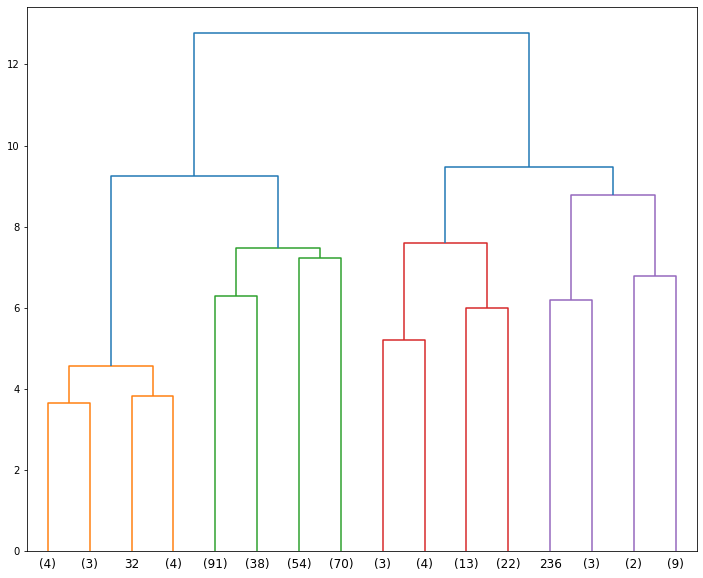

/Users/manya/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Число кластеров = 2


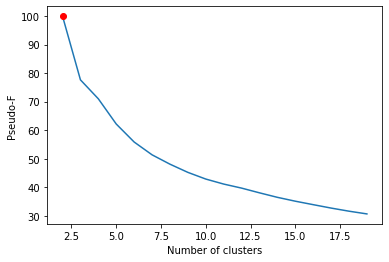

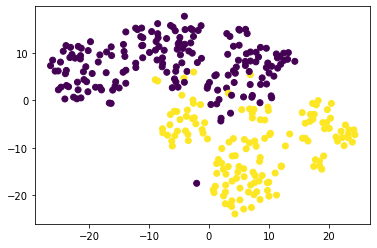

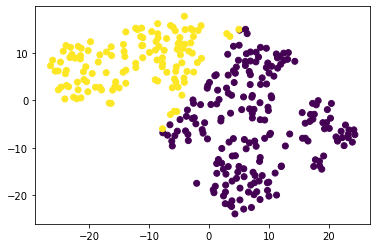

In [25]:
k_8__2, label_8__2, x_axis_8__2, y_axis_8__2, x_axis_8_7__2, y_axis_8_7__2, label_8_7__2  = all(df_8)


# 5
print('Число кластеров =', k_8__2)
    
# 6
plt.scatter(x_axis_8__2, y_axis_8__2, c = label_8__2)
plt.show()

# 7
plt.scatter(x_axis_8_7__2, y_axis_8_7__2, c = label_8_7__2)
plt.show()

## 9. Дополнительная предобработка набора данных

Произведите дополнительную предобработку набора данных, сделав распределения переменных более симметричными. Для этого с помощью гисторамм или метода describe в dataframe или метода skew найдите переменные с одной модой и тяжелым правым хвостом, примените к ним преобразование log(1+x). Запустите функцию из шага 8. Как изменилось число кластеров, проекции и лучшие представители. Как считаете, субъективное качество кластеризации изменилось? Как и почему?

In [26]:
df_9 = df_2.copy()
df_9_1 = df_9.mode()
df_9_1.isnull().sum()
my_df = df_9_1.isnull().sum().to_frame(name = 'values')
my_df_2 = my_df.where(my_df.values == 321)
my_df_2.dropna()

,values
nHome,321.0
nRuns,321.0
nRBI,321.0
nBB,321.0
YrMajor,321.0
CrRbi,321.0
CrBB,321.0
League,321.0
Division,321.0
Position,321.0


### Построим график для каждой переменной кроме 'League', 'Division', 'Position' и 'Div'.

In [27]:
def plot_9(z_1, z_2):
    Y = z_1
    X = z_2

    plt.figure(figsize = (12, 5))

    plt.subplot(1, 2, 1)
    sns.distplot(Y, label='target')

/Users/manya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


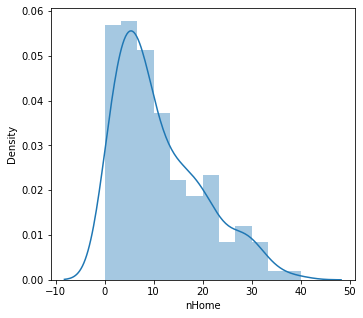

In [28]:
z_3 = df_9.drop(columns = ['nHome'])
plot_9(df_9['nHome'], z_3)

/Users/manya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


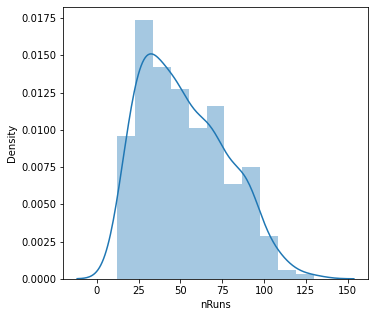

In [29]:
z_3 = df_9.drop(columns = ['nRuns'])
plot_9(df_9['nRuns'], z_3)

/Users/manya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


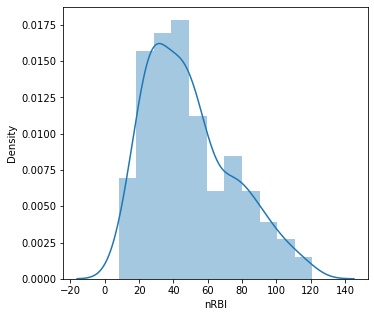

In [30]:
z_3 = df_9.drop(columns = ['nRBI'])
plot_9(df_9['nRBI'], z_3)

/Users/manya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


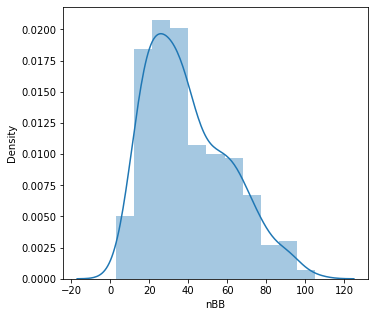

In [31]:
z_3 = df_9.drop(columns = ['nBB'])
plot_9(df_9['nBB'], z_3)

/Users/manya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


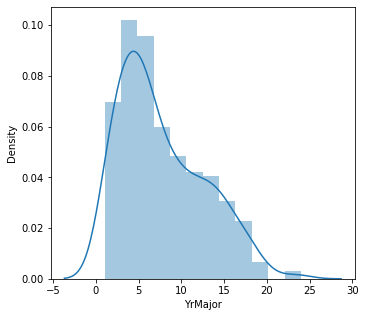

In [32]:
z_3 = df_9.drop(columns = ['YrMajor'])
plot_9(df_9['YrMajor'], z_3)

/Users/manya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


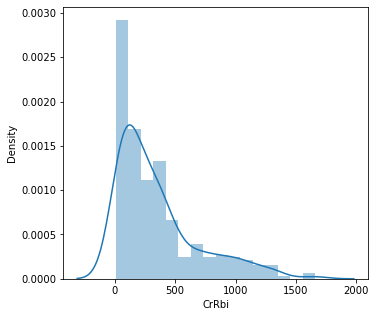

In [33]:
z_3 = df_9.drop(columns = ['CrRbi'])
plot_9(df_9['CrRbi'], z_3)

/Users/manya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


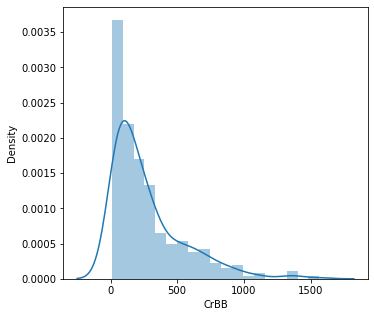

In [34]:
z_3 = df_9.drop(columns = ['CrBB'])
plot_9(df_9['CrBB'], z_3)

/Users/manya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


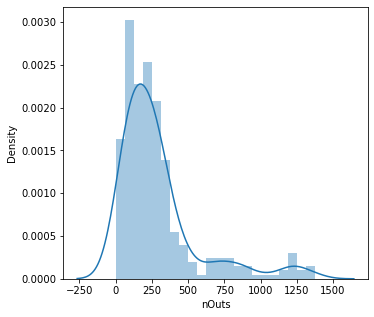

In [35]:
z_3 = df_9.drop(columns = ['nOuts'])
plot_9(df_9['nOuts'], z_3)

/Users/manya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


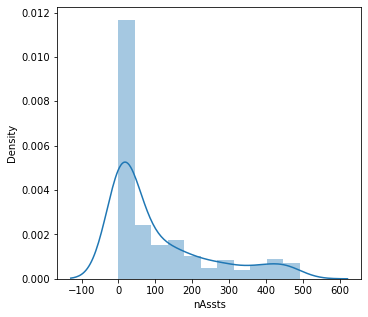

In [36]:
z_3 = df_9.drop(columns = ['nAssts'])
plot_9(df_9['nAssts'], z_3)

/Users/manya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


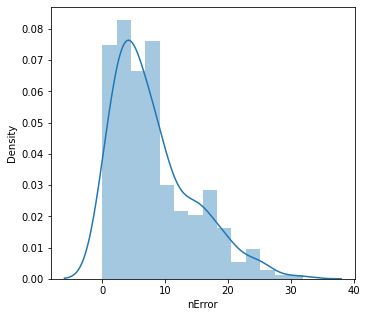

In [37]:
z_3 = df_9.drop(columns = ['nError'])
plot_9(df_9['nError'], z_3)

/Users/manya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


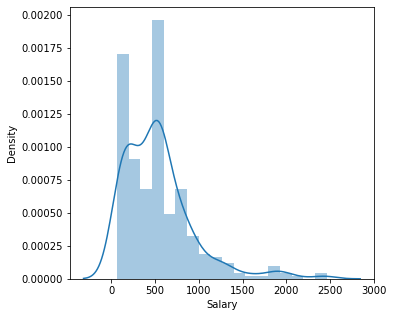

In [38]:
z_3 = df_9.drop(columns = ['Salary'])
plot_9(df_9['Salary'], z_3)

/Users/manya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


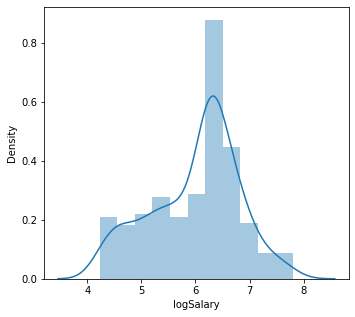

In [39]:
z_3 = df_9.drop(columns = ['logSalary'])
plot_9(df_9['logSalary'], z_3)

### Переменные с одной модой и тяжелым правым хвостом:
1. nHome
2. nRuns
3. nRBI
4. nBB
5. YrMajor
6. CrRbi
7. CrBB
8. nOuts
9. nAssts
10. nError
11. Salary


In [40]:
df_9_2 = df_9.copy()

In [41]:
def replacement(z_2_1, z_2_2):
    for i in range(df_9_2.shape[0]):
        z_2_1[i] = np.log(1 + z_2_2[i])

In [42]:
replacement(df_9_2['nHome'], df_9_2['nHome'])
replacement(df_9_2['nRuns'], df_9_2['nRuns'])
replacement(df_9_2['nRBI'], df_9_2['nRBI'])
replacement(df_9_2['nBB'], df_9_2['nBB'])
replacement(df_9_2['YrMajor'], df_9_2['YrMajor'])
replacement(df_9_2['CrRbi'], df_9_2['CrRbi'])
replacement(df_9_2['CrBB'], df_9_2['CrBB'])
replacement(df_9_2['nOuts'], df_9_2['nOuts'])
replacement(df_9_2['nAssts'], df_9_2['nAssts'])
replacement(df_9_2['nError'], df_9_2['nError'])
replacement(df_9_2['Salary'], df_9_2['Salary'])
df_9_2

/var/folders/6x/rs3q6wm50jqgd1x59wf94cv80000gn/T/ipykernel_4976/1847294483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z_2_1[i] = np.log(1 + z_2_2[i])


,Name,Team,nAtBat,nHits,nHome,nRuns,nRBI,nBB,YrMajor,CrAtBat,...,CrBB,League,Division,Position,nOuts,nAssts,nError,Salary,Div,logSalary
0,"Allanson, Andy",Cleveland,293,66,0.693147,3.433987,3.401197,2.708050,0.693147,293,...,2.708050,American,East,C,6.102559,3.526361,3.044522,6.285860,AE,6.285860
1,"Ashby, Alan",Houston,315,81,2.079442,3.218876,3.663562,3.688879,2.708050,3449,...,5.929589,National,West,C,6.450470,3.784190,2.397895,6.165418,NW,6.165418
2,"Davis, Alan",Seattle,479,130,2.944439,4.204693,4.290459,4.343805,1.386294,1624,...,5.575949,American,West,1B,6.781058,4.418841,2.708050,6.175867,AW,6.175867
3,"Dawson, Andre",Montreal,496,141,3.044522,4.189655,4.369448,3.637586,2.484907,5628,...,5.872118,National,East,RF,5.303305,2.484907,1.386294,6.216606,NE,6.216606
4,"Galarraga, Andres",Montreal,321,87,2.397895,3.688879,3.761200,3.433987,1.098612,396,...,3.526361,National,East,1B,6.692084,3.713572,1.609438,4.527209,NE,4.527209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,"McGee, Willie",St Louis,497,127,2.079442,4.189655,3.891820,3.637586,1.791759,2703,...,4.934474,National,East,CF,5.786897,2.302585,1.386294,6.552508,NE,6.552508
318,"Randolph, Willie",New York,492,136,1.791759,4.343805,3.931826,4.553877,2.564949,5511,...,6.775366,American,East,2B,5.749393,5.945421,3.044522,6.775366,AE,6.775366
319,"Tolleson, Wayne",Chicago,475,126,1.386294,4.127134,3.784190,3.970292,1.945910,1700,...,4.990433,American,West,3B,3.637586,4.736198,2.079442,5.955837,AW,5.955837
320,"Upshaw, Willie",Toronto,573,144,2.302585,4.454347,4.110874,4.369448,2.197225,3198,...,5.808142,American,East,1B,7.181592,4.882802,2.564949,6.867974,AE,6.867974


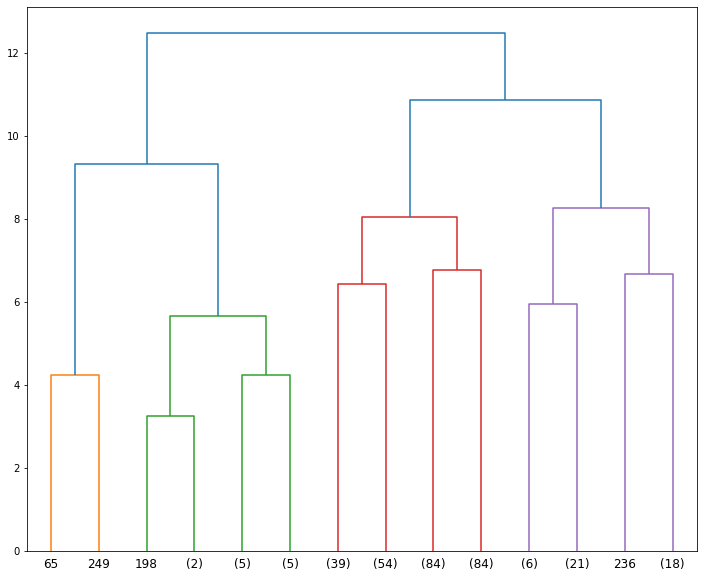

/Users/manya/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Число кластеров = 2


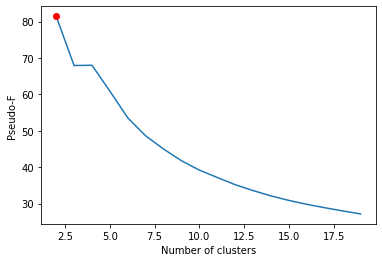

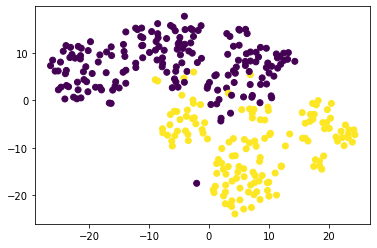

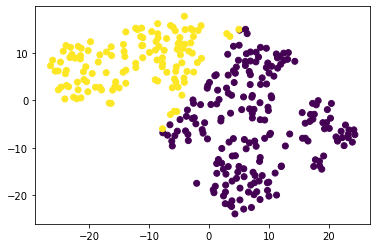

In [43]:
df_9_3 = df_9_2.copy()

k_9, label_9_1, x_axis_9_1, y_axis_9_1, x_axis_9_2, y_axis_9_2, label_9_2  = all(df_9_3)

# 5
print('Число кластеров =', k_9)
    
# 6
plt.scatter(x_axis_9_1, y_axis_9_1, c = label_9_1)
plt.show()

# 7
plt.scatter(x_axis_9_2, y_axis_9_2, c = label_9_2)
plt.show()

### Как изменилось число кластеров, проекции и лучшие представители. Как считаете, субъективное качество кластеризации изменилось? Как и почему?

### Число кластеров не изменилось

df_9_2 = df_2.copy()
df_9_2.describe()

df_9 = df_2.copy()
nHome = df_9['nHome'].describe().to_frame(name = 'values')
nHome

if nHome['values'].loc[nHome.index[1]] > nHome['values'].loc[nHome.index[5]]:
    print(1)

nRuns = df_9['nRuns'].describe().to_frame(name = 'values')
if nRuns['values'].loc[nRuns.index[1]] > nRuns['values'].loc[nRuns.index[5]]:
    print(1)

## 10. 5 наиболее значимых переменных

Отберите 5 наиболее значимых переменных с помощью метода VarClus. Запустите функцию из шага 8. Как изменилось число кластеров, проекции и лучшие представители. Как считаете, субъективное качество кластеризации изменилось? Как и почему?

In [44]:
df_10 = df_3.copy()
#df_10.drop(columns, axis=1,inplace=True)
df_10_vc = VarClusHi(df_10,maxeigval2=1,maxclus=None)
df_10_vc.varclus()
df_10_vc.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,YrMajor,0.847532,0.029974,0.157179
1,0,CrAtBat,0.960769,0.050032,0.041298
2,0,CrHits,0.943996,0.058499,0.059484
3,0,CrHome,0.774178,0.114426,0.255001
4,0,CrRuns,0.959208,0.080220,0.044349
...,...,...,...,...,...
66,30,Team_Cleveland,1.000000,0.080478,0.000000
67,31,Position_CD,1.000000,0.028441,0.000000
68,32,Position_SS,1.000000,0.149914,0.000000
69,33,Position_13,1.000000,0.068536,0.000000


In [45]:
max_RS_Ratio = df_10_vc.rsquare.sort_values(by=["Cluster", "RS_Ratio"], ascending=[True, False])
for i in range(5):
    print(max_RS_Ratio["Variable"].values[i])

Team_San Francisco
Position_DH
CrHome
YrMajor
CrBB


hierarchy = list()
variance_explained = dict ()
vch = VarClusHi(df_10,maxeigval2=1,maxclus=None)
vch.varclus ()
for _, x in vch.clusters.items () : # number, cluster
    cluster = frozenset (x.clus)
    hierarchy.append(cluster)
    variance_explained[cluster] = x.eigval1

plt.figure(figsize = (30, 10))
plt.xticks(rotation = 'vertical')
cmap = plt.cm.tab20c(np.linspace(0, 1, len(hierarchy)))
for i, cluster in enumerate(hierarchy):
    x = list(cluster)
    y = np.ones(len(x)) * variance_explained[cluster]
    for bar in plt.bar(x, y, zorder = - i):
        bar.set_color(cmap[i])